# CABIN: Cuts as Biases in Networks


## Importing Data
### data_concat
**data_concat(path, files, tree, features)**

Uses a concatenation loop to return an awkward array of data 
#### Parameters:
* **path:**

  The data path that your files are apart of.
* **files:** *list*

  Files located in your path that you want to use.
* **tree:** 

  Name of treename.
* **features:** *list*

  What features you want to use.
#### Returns:
* **data:** *awkward array*

  Shape : \
  [ 'feat0': [0,1,2,3,...], \
  [ 'feat1': [0,1,2,3,...], \
  [ 'feat2': [0,1,2,3,...], \
  ... \
  [ 'featN': [0,1,2,3,...]]

In [1]:
from LearningCutsUtils.Utils import *

filespath="/data/mhance/photons/NTUP_ZLLG/"
filename = [
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.DAOD_EGAM3.e3601_e5984_s3126_r10724_r10726_p3954.root',
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.DAOD_EGAM4.e3601_e5984_s3126_r10724_r10726_p3954.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_140_E_CMS.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_15_35.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_35_70.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_70_140.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_7_15.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_7_15.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_140_E_CMS.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_15_35.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_35_70.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_70_140.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root'
]
treename = "output"
expressions_for_batch = ['ph.pt','ph.eta','ph.rhad','ph.rhad1','ph.reta','ph.rphi','ph.weta2','ph.eratio','ph.deltae','ph.wstot','ph.fside','ph.w1','ph.truth_pdgId','ph.truth_type','ph.convFlag','EventInfo.actualIntPerXing']

data = data_concat(filespath,filename,treename,expressions_for_batch)

In [2]:
print(data)

[{'ph.pt': 1.35e+04, 'ph.eta': -1.6, 'ph.rhad': 0.0163, ...}, {...}, ..., {...}]


### data_mask
**data_mask(data, energy_range, eta_range)**

Masks data to the energy and eta range that is inputted.
#### Parameters:
* **data:** *awkward array*

  Data in the form of an awkward array that has arrays indexed "ph.pt" and "ph.eta". 

* **energy_range:** *= (min_energy, max_energy)* 

  Lower and upper bounds on energy. Defaults to no bounds.
* **eta_range:** *= (min_eta, max_eta)* 

  Lower and upper bounds on psuedorapidity. Defaults to no bounds.
#### Returns:
* **masked_data:** *numpy array*

  Shape : features $\times$ event candidates.

This mask includes 1317836 event candidates:


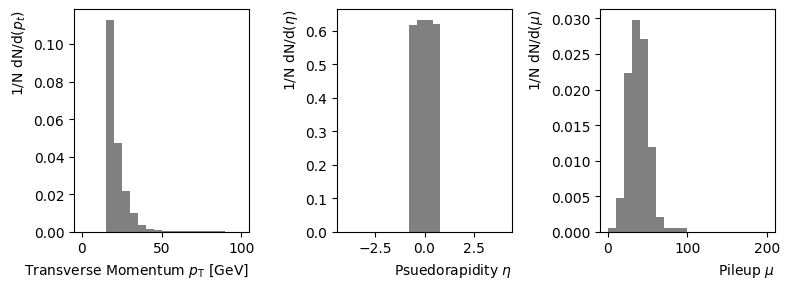

In [3]:
erange = (15000,100000)
absetarange = (0.,0.8)
murange = (0,200)
masked_data = data_mask(data,erange,absetarange, murange)

### Discriminating Variables:
There are three broad categories of discriminating variables for photon identi cation that are based
 on calorimeter information. The first category considers the amount of energy deposited in different
 layers of the EM and hadronic calorimeters relative to the total cluster energy; the second looks at
 the profile of the EM shower in the primary (second) sampling layer of the EM calorimeter; and
 the final looks at the shower profile in the strip layer. 
#### Energy Ratios:
* $R_{had}$: the ratio of total transverse energy in the hadronic calorimeter (in a $\Delta \eta \times \Delta \phi$ region of $0.24 \times 0.24$ behind the photon cluster) to the transverse energy of the photon cluster.
* $R_{had_{1}}$: the ratio of total transverse energy in the first sampling layer of the hadronic calorimeter (in a $\Delta \eta \times \Delta \phi$ region of $0.24 \times 0.24$ behind the photon cluster) to the transverse energy of the photon cluster.
$R_{had}$ is only considered for $ 0.8 \leq |\eta| < 1.37$ (where the hadronic calorimeter
 transitions from the barrel to the extended barrel). $R_{had_{1}}$ is considered for all other $\eta$.
#### Layer-2 Variables:
* $w_2$: Lateral width of the shower in $\eta$ over a region of $3\times 5$ cells in $\Delta \eta \times \Delta \phi$  around the center of the photon cluster. It is defined as:
$$ w_{2} = \sqrt{   \frac{\sum E_i \eta_i^2}{E_i} - \left[\frac{\sum E_i \eta_i}{E_i}\right]^2}$$
where $i$ indicates the cell index, ranging from 0 to 14. 

* $R_{\eta}$ The spread in $\eta$ of the energy outside the cluster. Defined as:
$$ R_{\eta} = \frac{E_{3 \times 7}^{S2}}{E_{7 \times 7}^{S2}}$$
where $E_{x \times y}^{S2}$ is the energy contained in $x \times y$ cells ($\eta \times \phi$) of the second layer, centerd on the cluster used to define the photon.


* $R_{\phi}$ The spread in $\phi$ of the energy within (and outside of) the cluster. Defined as:
$$ R_{\phi} = \frac{E_{3 \times 3}^{S2}}{E_{7 \times 7}^{S2}}$$
where $E_{x \times y}^{S2}$ is defined as it is for $R_{\eta}$.

#### Strip Variables:
* $F_{side}$: The spread in the lateral spread in $\eta$ of the shower. It is defined as:
$$ F_{side} = \frac{E_{7 \times 1}^{S1} - E_{3 \times 1}^{S1}}{E_{7 \times 1}^{S1}}$$
where $E_{x \times y}^{S1}$ are the $x \times y$ ($\eta \times \phi$) strips surrounding the strip with the largest energy.

* $w_{s,3}$: The weighted shower width in $\eta$ in the three strips. It is defined as:
$$ w_{s,3} = \sqrt{\frac{\sum E_{i}(i-i_{max})^2}{\sum E_{i}}}$$
where $i$ corresponds to the strip number, and $i_{max}$ is index of the strip with the largest energy.

* $w_{s,tot}$: Identical to $w_{s,3}$, except it is measured over all strips in a region of $\Delta \eta \times \Delta \phi = 0.0625 \times .2$ (20 $\times$ 2 strips).

* $\Delta E$: Attempts to quantify the degree to whcih there are two peaks present in the energy profile. It is defined as:
$$ \Delta E = \left[E_{max2}^{S1} - E_{min}^{S1}\right]$$
where $E_{max2}^{S1}$ is the energy of the strip that has the second greatest energy, and $E_{min}^{S1}$ is the energy of the strip with the least energy found between the strips with the greatest and second greatest energies. For candidates without a distinguishable second peak, this value is close to zero, while candidates with two peaks in the strips have some larger value. 

* $E_{ratio}$ The size of the second maximim relative to the size of the first maximum. It is defined as:

$$ E_{ratio} = \frac{E_{max1}^{S1} - E_{max2}^{S1}}{E_{max1}^{S1} + E_{max2}^{S1}} $$

Distributions for all discriminating videos are generated below for the selected datasets used.

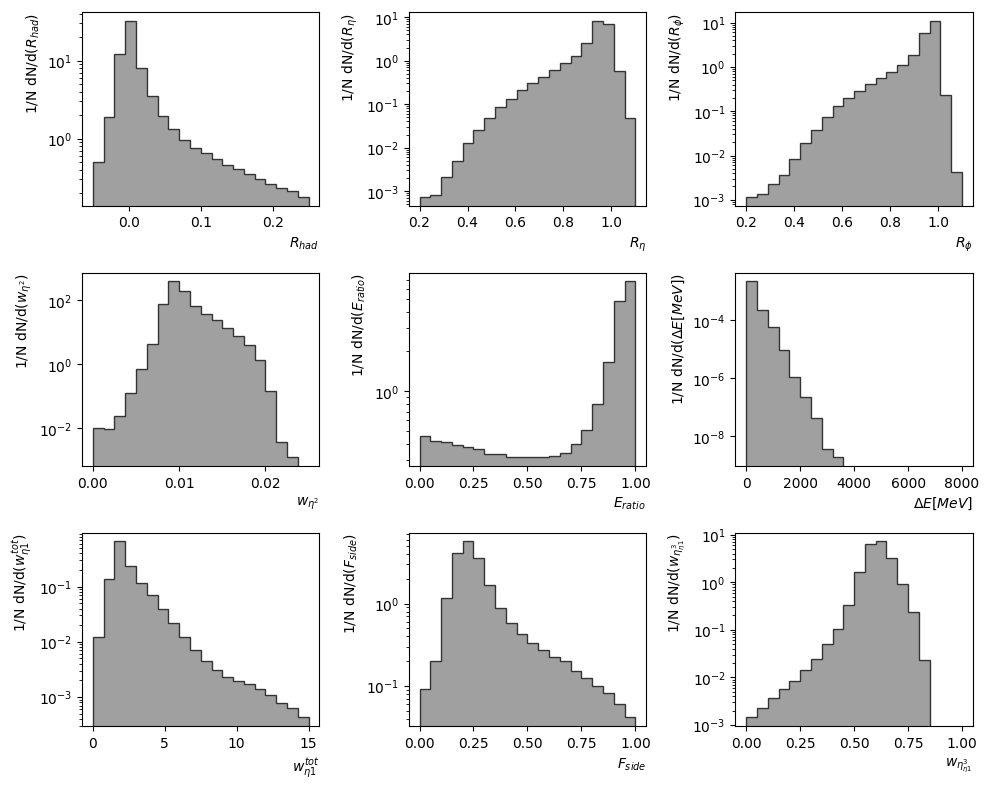

In [4]:
plot_feats(masked_data)

### Preselection of Converted Signal Photons

### get_labels
**get_labels(data)**

Checks if each event candidate is predetermined to be signal or backround.
#### Parameters:
* **data:** *numpy array*

  Data has features labeled 'ph.truth_pdgId' and 'ph.truth_type'.
  
  ```
  if d['ph.truth_pdgId'][i] == 22 and \
  d['ph.truth_type'][i]==15 or \
  d['ph.truth_type'][i]==13 or \
  d['ph.truth_type'][i]==14:
      labels.append(1)
  else:
      labels.append(0)
  labels = torch.Tensor(labels) ```

#### Returns:
* **labels:** *torch tensor*

  Shape : 1 $\times$ event candidates.

In [5]:
signal_labels = get_labels(masked_data)

### true_sort
**true_sort(data,labels)**

Checks if each event candidate is predetermined to be signal or backround.
#### Parameters:
* **data:** *numpy array*
* **labels** *torch tensor*
  
  ```
  if labels[i] == 1:
      signal.append(data[i])
  else:
      backround.append(data[i])
  ```

#### Returns:
* **signal:** *numpy array*
  
  Shape : len(discriminating_vars) $\times$  signal event candidates.
* **background:** *numpy array*

  Shape : len(discriminating_vars) $\times$  background event candidates.

  

In [6]:
signal, backround = true_sort(masked_data,signal_labels)

We are working with:
840213 Signal Events
477623 Backround Events
Signal:Backround = 1.759


### Plotting True Vs Untrue Features for Conv

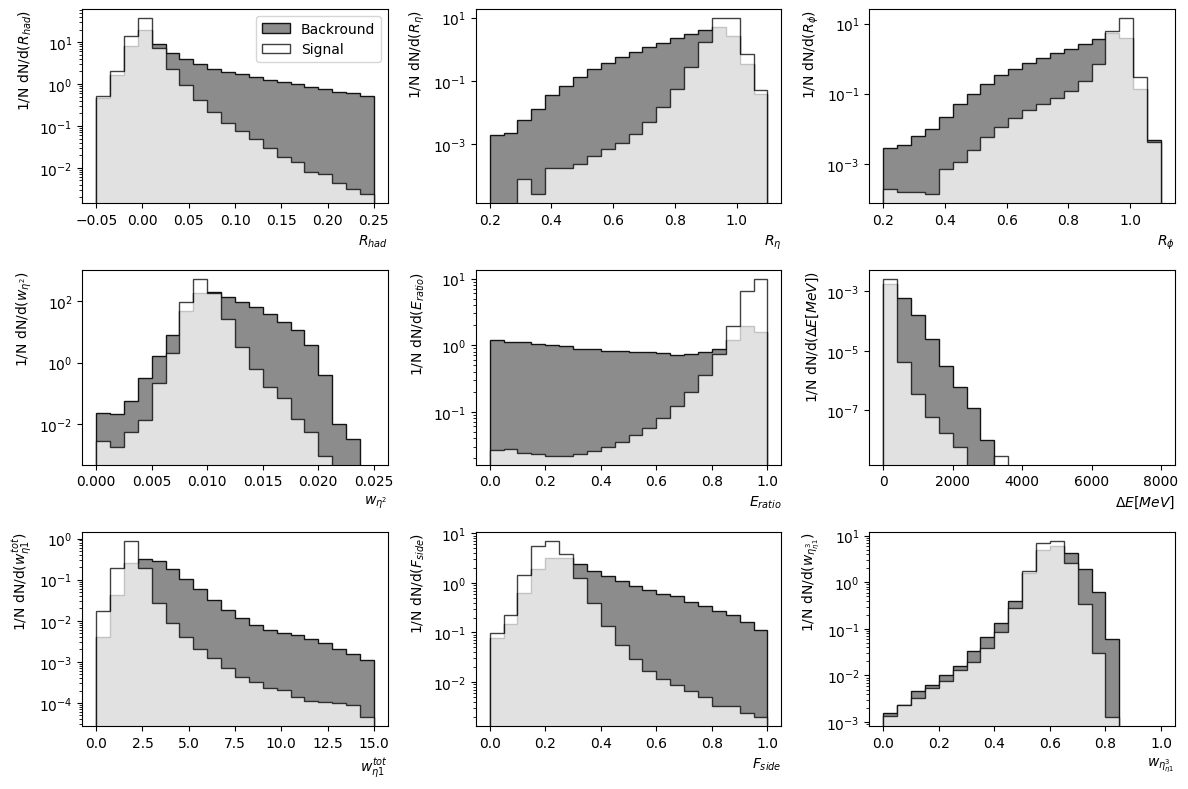

In [7]:
plot_signal(signal,backround)

## Network Architecture

#### Input Tensor:
Let $X$ represent our input tensor that has shape $N\times F$:
$$ X \in \mathbb{R}^{N\times F} $$
Where $N$ is the number of event candidates and $F$ is the number of features.

#### Linear Transform:
The network computes this as:

$$ T = X \cdot W^{diag} + b $$

Where:
* $ W \in \mathbb{R}^F $ weight vector (one weight per feature)
* $ W^{diag} \in \mathbb{R}^{F\times F}$ weight matrix, diagnal matrix of $W$
$$ W^{diag} = \begin{pmatrix}
w_1 & 0 & 0 & \cdots & 0 \\
0 & w_2 & 0 & \cdots & 0 \\
0 & 0 & w_2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & w_F 
\end{pmatrix}$$
* $ b \in \mathbb{R}^F $

#### To be cont.



In [8]:
import torch
import torch.nn
import torch.optim
import torch.utils.data

import time
import math

In [9]:
from LearningCutsUtils.OneToOneLinear import OneToOneLinear
from LearningCutsUtils.PtScanNetwork import PtScanNetwork
from LearningCutsUtils.LossFunctions import lossvars, loss_fn, effic_loss_fn

In [10]:
split_ratio = 0.25
targeteffics=[0.2,0.4,0.6,0.7,0.8,0.9]
pt_ranges = [(15000,20000),(20000,25000),(25000,30000),(35000,40000),(40000,50000),(50000,100000)]
mu_ranges = [(0,20),(20,40),(40,60),(60,80),(80,100)]

def test_train_split(d,pt,mu,ratio):

    data_bucket = [[[] for j in range(len(mu))] for i in range(len(pt))]
    label_bucket = [[[] for j in range(len(mu))] for i in range(len(pt))]
    dlist = ['ph.rhad1', 'ph.reta', 'ph.rphi', 'ph.weta2', 'ph.eratio', 'ph.deltae', 'ph.wstot', 'ph.fside', 'ph.w1']
    loosetrues = []
    for i in range(len(d['ph.pt'])):
        if d['ph.truth_pdgId'][i] == 22 and (d['ph.truth_type'][i]==15 or 
                                             d['ph.truth_type'][i]==13 or
                                             d['ph.truth_type'][i]==14):
            true = 1
        else:
            true = 0
        
        for j in range(len(pt)):
            for k in range(len(mu)):
                if (d['ph.pt'][i] >= pt[j][0] and d['ph.pt'][i] < pt[j][1]) \
                & (d['EventInfo.actualIntPerXing'][i] >= mu[k][0] and d['EventInfo.actualIntPerXing'][i] < mu[k][1]):
    
                    label_bucket[j][k].append(true)
                    data_bucket[j][k].append([d[key][i] for key in dlist])
                    break

    loosetrues = torch.Tensor(loosetrues)
    
    x_train_tensor_list = [[[] for j in range(len(mu))] for i in range(len(pt))]
    x_test_tensor_list = [[[] for j in range(len(mu))] for i in range(len(pt))]
    y_train_tensor_list = [[[] for j in range(len(mu))] for i in range(len(pt))]
    y_test_tensor_list = [[[] for j in range(len(mu))] for i in range(len(pt))]
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    sc_list = [[StandardScaler() for j in range(len(mu))] for i in range(len(pt))]
    
    for i in range(len(pt)):
        for j in range(len(mu)):
            print(len(data_bucket[i][j]))
            X = np.array(data_bucket[i][j], dtype=np.float32)
            Y = np.array(label_bucket[i][j], dtype=np.float32)
            X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=ratio, random_state=42)
            
        
            
            
            X_train = sc_list[i][j].fit_transform(X_train)
            X_test = sc_list[i][j].transform(X_test)
            
            x_train_tensor_list[i][j] = torch.tensor(X_train, dtype=torch.float).detach()
            y_train_tensor_list[i][j] = torch.tensor(y_train, dtype=torch.float).detach()
            
            x_test_tensor_list[i][j] = torch.tensor(X_test, dtype=torch.float).detach()
            y_test_tensor_list[i][j] = torch.tensor(y_test, dtype=torch.float).detach()
        
    return x_train_tensor_list, y_train_tensor_list, x_test_tensor_list, y_test_tensor_list, sc_list

x_train, y_train, x_test, y_test, scalers = test_train_split(masked_data,pt_ranges,mu_ranges,split_ratio)

36548
382658
296929
20617
7727
16806
164340
119215
7796
2684
8079
75569
53292
3323
1119
1319
13355
9507
609
218
954
8834
6289
444
130
855
8165
5834
352
127


In [11]:
from LearningCutsUtils.OneToOneLinear import OneToOneLinear
from LearningCutsUtils.ScanNetwork import ScanNetwork
from LearningCutsUtils.LossFunctions import lossvars, loss_fn
from LearningCutsUtils.LossFuncForPT import pt_loss_fn


In [12]:
N=len(signal_labels) # number of points
m=9 # dimensions


In [13]:
gt=1.
lt=-1.
cuts_gt_lt = [lt, gt, gt, lt, gt, ### change these to correct cuts
              lt, lt, lt, lt] # l g g l g l l l l 

In [14]:

# some hyperparameters
activation_input_scale_factor=15
learning_rate=0.1
# batch_size=int(len(y_train)/1.) # only one batch
epochs=50
alpha=10.   # scaling factor to tune how important hitting the target signal efficiency is
beta=1     # scaling factor to tune how important background rejection is
gamma=1e-5  # scaling factor for how aggressively to push the cuts to zero
delta=0.
epsilon=1e-0   # how much to penalize deviations

In [15]:
torch.manual_seed(123)
net = ScanNetwork(m,pt_ranges,mu_ranges,targeteffics,cuts_gt_lt,activation_input_scale_factor) # will take m inputs, return m*n_eff outputs
torch.save(net.state_dict(), 'net_learningbiases_pttarget_untrained.pth')

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [16]:
device="cpu"
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    device="cuda:0"
print(device)

cuda:0


In [17]:
y_pred = net(x_train)

In [18]:
import importlib
import sys
import LearningCutsUtils.ScanNetwork
import LearningCutsUtils.LossFunctions
importlib.reload(LearningCutsUtils.ScanNetwork)
importlib.reload(LearningCutsUtils.LossFunctions)
from LearningCutsUtils.ScanNetwork import ScanNetwork
from LearningCutsUtils.LossFunctions import full_loss_fn, loss_fn

In [19]:
losses = []
losses_test = []

net.load_state_dict(torch.load('net_learningbiases_pttarget_untrained.pth',weights_only=True))

debug=False

for epoch in range(epochs):
    net.train()
    start_time = time.time()
    y_pred = net(x_train)
    optimizer.zero_grad()
    loss = full_loss_fn(y_pred, y_train, m, net, alpha, beta, gamma, delta, epsilon,debug=debug)
    loss.totalloss().sum().backward()
    optimizer.step()
    losses.append(loss)
    net.eval() # configure the model for evaluation (testing)
    y_pred = net(x_test)
    test_loss = full_loss_fn(y_pred, y_test, m, net, alpha, beta, gamma, delta, epsilon)
    losses_test.append(test_loss)
    end_time=time.time()
    elapsed_time = end_time - start_time
    print(f"Completed epoch {epoch:2d} in {elapsed_time:4.1f}s, Train loss={loss.totalloss().sum().item():4.1e}, Test loss={test_loss.totalloss().sum().item():4.1e}")

torch.save(net.state_dict(), 'net_learningbiases_pttarget_trained.pth')

Completed epoch  0 in  0.8s, Train loss=4.8e+02, Test loss=3.8e+02
Completed epoch  1 in  0.7s, Train loss=3.8e+02, Test loss=3.0e+02
Completed epoch  2 in  0.7s, Train loss=3.0e+02, Test loss=2.4e+02
Completed epoch  3 in  0.9s, Train loss=2.3e+02, Test loss=1.9e+02
Completed epoch  4 in  0.7s, Train loss=1.8e+02, Test loss=1.5e+02
Completed epoch  5 in  0.8s, Train loss=1.5e+02, Test loss=1.2e+02
Completed epoch  6 in  0.9s, Train loss=1.2e+02, Test loss=1.0e+02
Completed epoch  7 in  0.9s, Train loss=9.8e+01, Test loss=8.6e+01
Completed epoch  8 in  0.8s, Train loss=8.2e+01, Test loss=7.3e+01
Completed epoch  9 in  0.9s, Train loss=7.1e+01, Test loss=6.3e+01
Completed epoch 10 in  0.8s, Train loss=6.2e+01, Test loss=5.5e+01
Completed epoch 11 in  0.8s, Train loss=5.4e+01, Test loss=4.8e+01
Completed epoch 12 in  0.8s, Train loss=4.9e+01, Test loss=4.3e+01
Completed epoch 13 in  0.7s, Train loss=4.4e+01, Test loss=3.8e+01
Completed epoch 14 in  0.8s, Train loss=4.0e+01, Test loss=3.4

In [20]:
import importlib
import sys
import LearningCutsUtils.Utils
importlib.reload(LearningCutsUtils.Utils)
from LearningCutsUtils.Utils import *

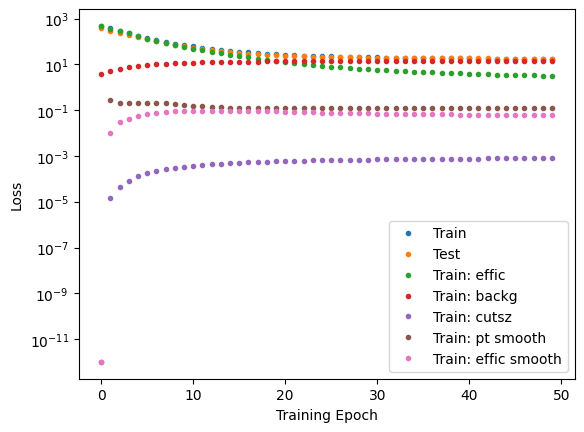

In [21]:
plotlosses(losses,losses_test)


In [22]:
sig_effics=[]
bkg_effics=[]
loss_sig_effics=[]
loss_bkg_effics=[]

for n in range(len(pt_ranges)):
    print(f"Pt: {pt_ranges[n]}")
    for m in range(len(mu_ranges)):
        for i in range(len(targeteffics)):
            print(f"Target efficiency: {targeteffics[i]*100}%")
            check_effic(x_test[n][m],y_test[n][m].numpy(),net.nets[n][m][i],True)
            sig_effic,bkg_effic = check_effic(x_test[n][m],y_test[n][m].numpy(),net.nets[n][m][i],False)
            sig_effics.append(sig_effic)
            bkg_effics.append(bkg_effic)
            
            # check that after reloading the weights we still get the same performance after pretraining
            net.nets[n][m][i].eval() # configure the model for evaluation (testing)
            y_pred = net.nets[n][m][i](x_test[n][m])
            test_loss = full_loss_fn(y_pred[n], y_test[n][m], m, net.nets[n][m][i], pt_ranges[n], alpha, beta, gamma, True)
            print("------------")
            # loss_sig_effics.append(test_loss.signaleffic.detach().numpy())
            # loss_bkg_effics.append(test_loss.backgreffic.detach().numpy())

# aisf changes effic

#use earl's backround and efficiency to compare to mine making a roc curb from my efficiencies
# earl's samples have more signal like photons, expect diff effics

Pt: (15000, 20000)
Target efficiency: 20.0%
Signal     efficiency with net outputs: 25.6%
Background efficiency with net outputs:  1.95911%
------------
Target efficiency: 40.0%
Signal     efficiency with net outputs: 42.8%
Background efficiency with net outputs:  4.00341%
------------
Target efficiency: 60.0%
Signal     efficiency with net outputs: 63.9%
Background efficiency with net outputs:  6.24645%
------------
Target efficiency: 70.0%
Signal     efficiency with net outputs: 73.2%
Background efficiency with net outputs:  7.80806%
------------
Target efficiency: 80.0%
Signal     efficiency with net outputs: 81.6%
Background efficiency with net outputs:  9.54003%
------------
Target efficiency: 90.0%
Signal     efficiency with net outputs: 88.2%
Background efficiency with net outputs: 11.49915%
------------
Target efficiency: 20.0%
Signal     efficiency with net outputs: 23.9%
Background efficiency with net outputs:  2.30096%
------------
Target efficiency: 40.0%
Signal     efficie

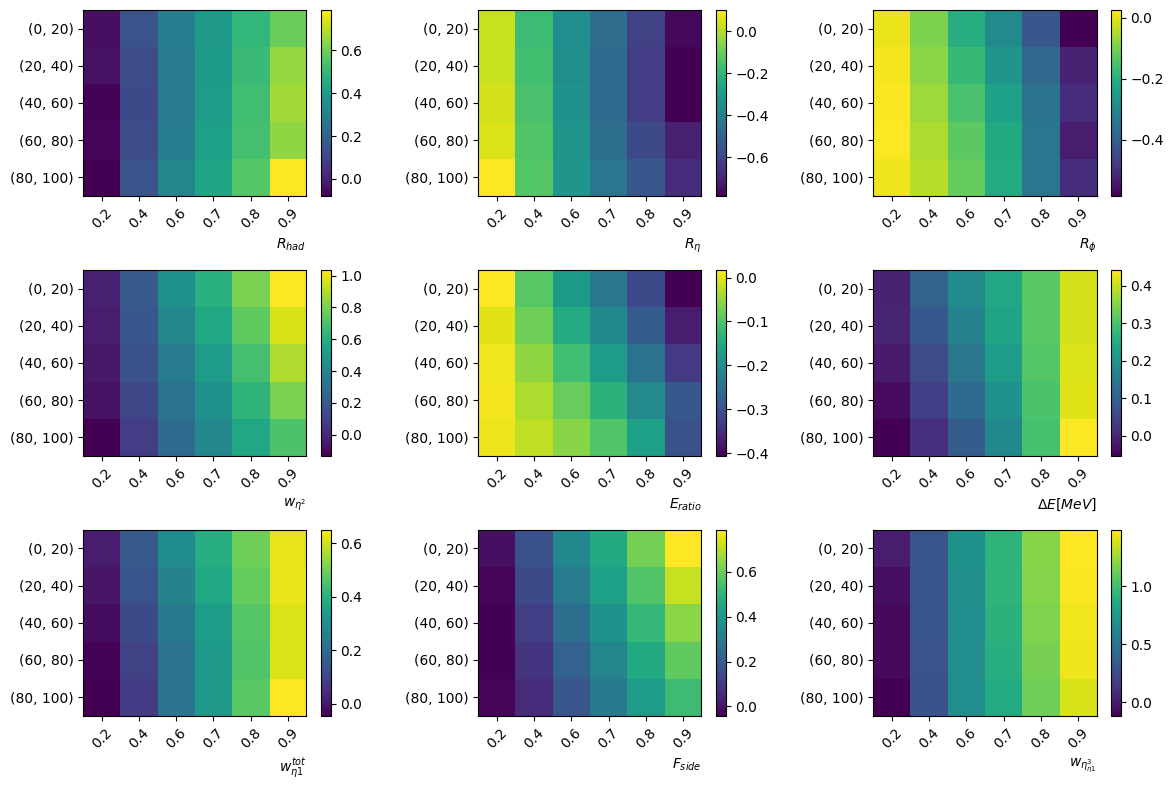

In [23]:
def cutsheatmap(net):
    latex_string = ['$R_{{had}}$','$R_{{\\eta}}$','$R_{{\\phi}}$','$w_{{\\eta^{{2}}}}$','$E_{{ratio}}$','$\\Delta E [MeV]$','$w^{{tot}}_{{\\eta 1}}$','$F_{{side}}$','$w_{{\\eta^{{3}}_{{\\eta 1}}}}$']
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
    targeteffics=net.effics
    pt=net.pt
    mu=net.mu
    m=net.features
    
    scaled_cuts=[[[[[0] for _ in range(len(targeteffics))] for _ in range (len(mu))] for _ in range(len(pt))] for i in range(m)]
    for i in range(len(pt)):
        for j in range(len(mu)):
            for k in range(len(targeteffics)):
                cuts=net.nets[i][j][k].get_cuts().detach().numpy()
                for f in range(m):
                    cutval=cuts[f]
                    scaled_cuts[f][i][j][k]=cutval
    
    
    for b, ax in enumerate(axes.flatten()):
        im = ax.imshow([[scaled_cuts[b][1][i][j] for j in range(len(targeteffics))]for i in range(len(mu))])
        cbar = plt.colorbar(im, ax=ax)
        # cbar.set_label("Scaled Cut Val", fontsize=10)
        # Show all ticks and label them with the respective list entries
        ax.set_xticks(range(len(targeteffics)), labels=targeteffics, rotation = 45)
        ax.set_yticks(range(len(mu)), labels=mu)
        
        ax.set_xlabel(latex_string[b],loc = 'right')
        
        # ax.set_title(f"Cuts Over Pt and mu for {latex_string[b]}")
    fig.tight_layout()


cutsheatmap(net)

477623
840213


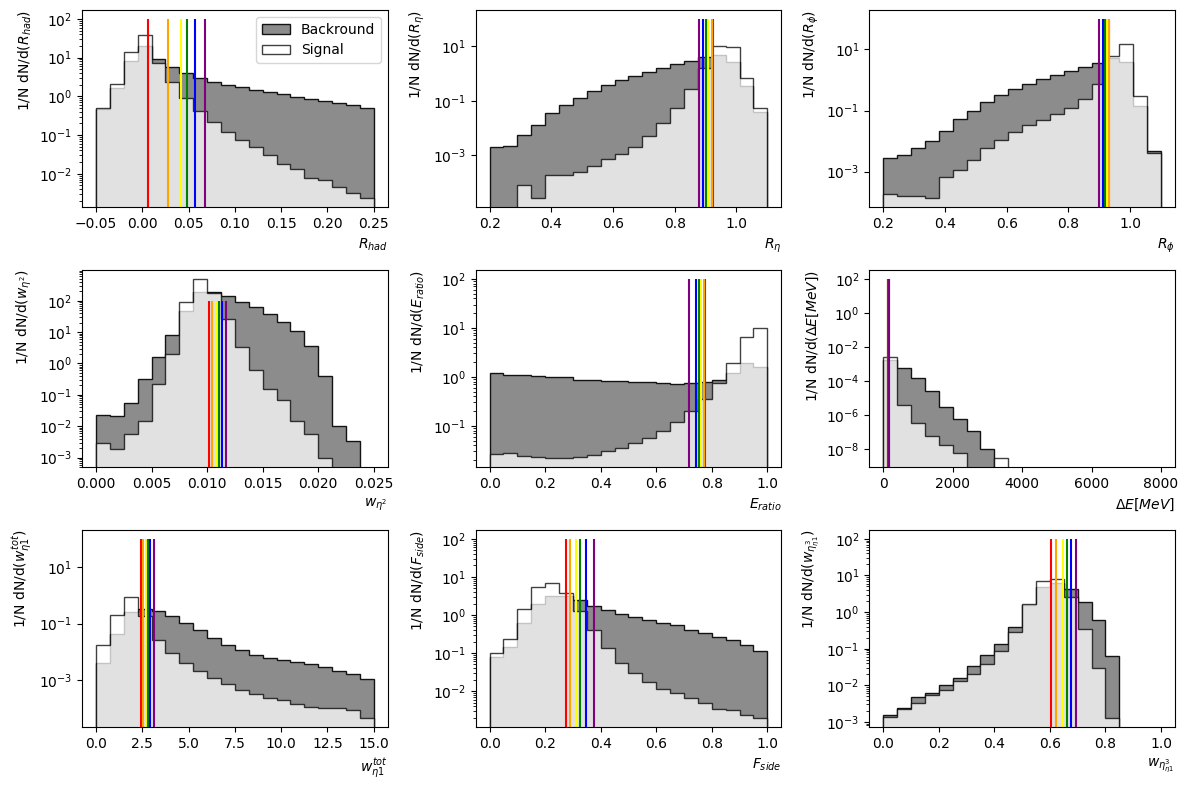

In [27]:
# Distributions of cuts
def plotcutspt(net,t,f,scalers):
    targeteffics=net.effics
    pt = net.pt
    mu=net.mu
    print(len(f[2]))
    print(len(t[3]))
    m=net.features
    scaled_cuts=[[[[[0] for _ in range(len(targeteffics))] for _ in range(len(mu))] for _ in range(len(pt))] for i in range(m)]
    unscaled_cuts=[[[[[0] for _ in range(len(targeteffics))] for _ in range(len(mu))] for _ in range(len(pt))] for i in range(m)]
    for i in range(len(pt)):
        for j in range(len(mu)):
            for k in range(len(targeteffics)):
                cuts=net.nets[i][j][k].get_cuts().detach().numpy()
                uncuts=scalers[i][j].inverse_transform(cuts.reshape(1, -1))[0]
                for p in range(m):
                    uncutval=uncuts[p]
                    unscaled_cuts[p][i][j][k]=uncutval
                    
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
    ranges = [(-0.05,0.25),(0.2,1.1),(0.2,1.1),(0,0.025),(0,1),(0,8000),(0,15),(0,1.),(0,1.)]
    latex_string = ['$R_{{had}}$','$R_{{\\eta}}$','$R_{{\\phi}}$','$w_{{\\eta^{{2}}}}$','$E_{{ratio}}$','$\\Delta E [MeV]$','$w^{{tot}}_{{\\eta 1}}$','$F_{{side}}$','$w_{{\\eta^{{3}}_{{\\eta 1}}}}$']
    clist = ['red','orange','yellow','green','blue','purple']
    nbins = 20

#stack histograms for pt bins from test data
    
    for i, ax in enumerate(axes.flatten()):
        ax.hist(f[i+2],density=True, range = ranges[i],bins=nbins,histtype = 'stepfilled',color='grey',alpha = 0.9, edgecolor='black', label = 'Backround')
        ax.hist(t[i+2], density=True, range = ranges[i],bins=nbins,histtype = 'stepfilled',color='white',alpha = 0.75, edgecolor='black', label = 'Signal')
        for c in range(len(clist)):
            ax.vlines(unscaled_cuts[i][0][0][c],0,100,colors=clist[c])
        ax.set_xlabel(latex_string[i],loc = 'right')
        ax.set_ylabel(f"1/N dN/d({latex_string[i]})",loc = 'top')
        if i == 0:
            ax.legend()
            # ax.set_title('**ATLAS**\nPrelimiary\nData',y=0.85)
        ax.set_yscale('log')
    fig.tight_layout()
plotcutspt(net,signal,backround,scalers)

In [25]:
def cuts_meshgrid(net,scalers):
    targeteffics=net.effics
    pt = net.pt
    mu=net.mu
    print(len(f[2]))
    print(len(t[3]))
    m=net.features
    scaled_cuts=[[[[[0] for _ in range(len(targeteffics))] for _ in range(len(mu))] for _ in range(len(pt))] for i in range(m)]
    unscaled_cuts=[[[[[0] for _ in range(len(targeteffics))] for _ in range(len(mu))] for _ in range(len(pt))] for i in range(m)]
    for i in range(len(pt)):
        for j in range(len(mu)):
            for k in range(len(targeteffics)):
                cuts=net.nets[i][j][k].get_cuts().detach().numpy()
                uncuts=scalers[i][j].inverse_transform(cuts.reshape(1, -1))[0]
                for p in range(m):
                    uncutval=uncuts[p]
                    unscaled_cuts[p][i][j][k]=uncutval

    

In [26]:
def make_ROC_curve_heat(y_test,x_test, net):
    net.eval() # configure the model for evaluation (testing)
    pt=net.pt
    effics = net.effics
    m=net.features
    y_pred = net(x_test)
    
    roc_matrix=[[[0] for _ in range(len(targeteffics))] for _ in range(len(pt))]
    for i in range(len(pt)):
        for j in range(len(effics)):
            y_pred_ij = y_pred[i][j].detach().numpy()
            y_test_i = y_test[i]
            roc_matrix[i][j] = roc_auc_score(y_test_i, y_pred_ij)

    im = plt.imshow([[roc_matrix[i][j] for j in range(len(targeteffics))]for i in range(len(pt))])
    cbar = plt.colorbar(im)
    # cbar.set_label("Scaled Cut Val", fontsize=10)
    # Show all ticks and label them with the respective list entries
    plt.xticks(range(len(targeteffics)), labels=targeteffics,)
    plt.yticks(range(len(pt)), labels=pt)
    
    # # Loop over data dimensions and create text annotations.
    # for i in range(len(pt)):
    #     for j in range(len(targeteffics)):
    #         # text = ax.text(j, i, scaled_cuts[b][i][j],
    #         #                ha="center", va="center", color="w")
    
    plt.title(f"AUC Scores")
    plt.tight_layout()

make_ROC_curve_heat(y_test,x_test, net)

AttributeError: 'list' object has no attribute 'detach'